In [51]:
image = cv2.imread('/content/demon.png', cv2.IMREAD_GRAYSCALE)


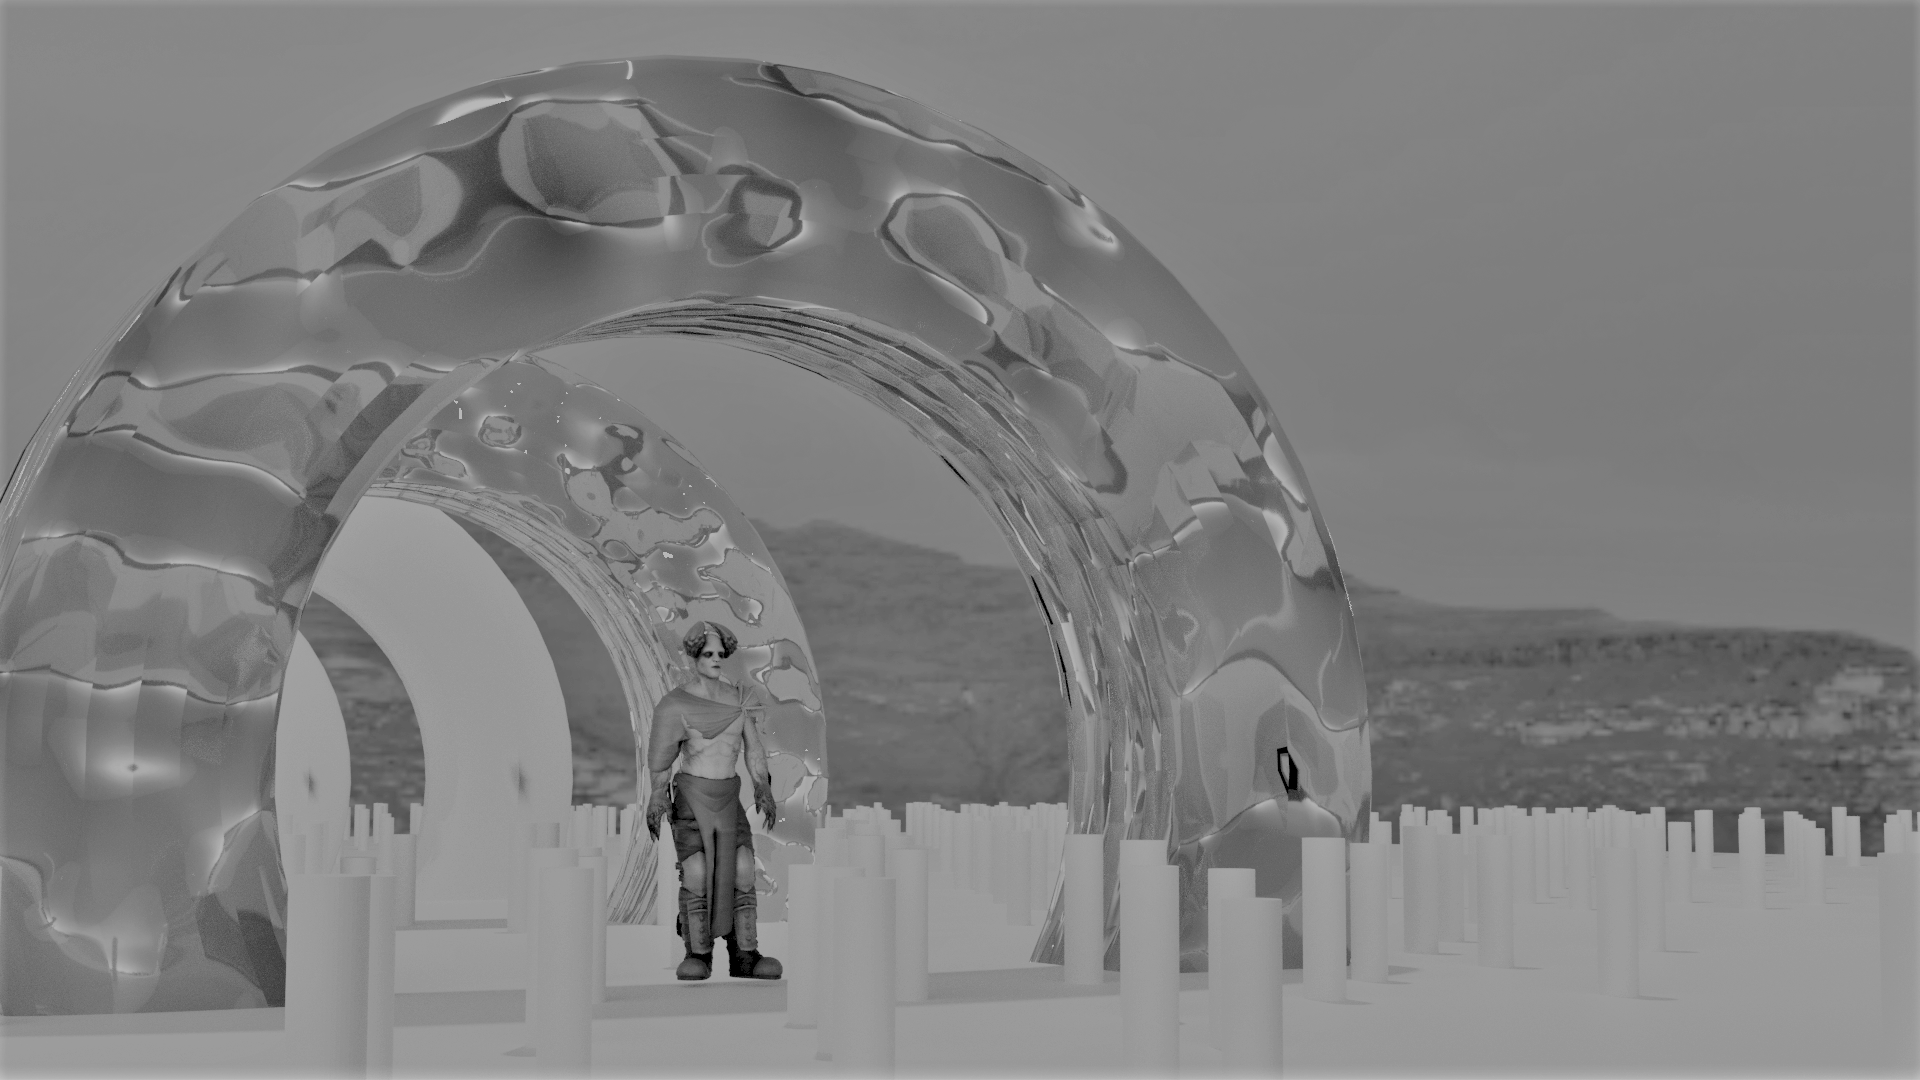

In [52]:
cv2_imshow(image)

In [9]:
x = np.array([[-1, 0, 1],[-2, 0, 2],
                   [-1, 0, 1]])

y = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])
image_height, image_width = image.shape
kernel_height, kernel_width = x.shape

In [16]:
output = np.zeros_like(image)


In [18]:
output.size

2073600

In [19]:
1080*1920

2073600

In [21]:
8//2

4

In [25]:
pad_height = kernel_height // 2
pad_width = kernel_width // 2
padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')



In [28]:
padded_image.shape

(1082, 1922)

In [31]:
output.shape

(1080, 1920)

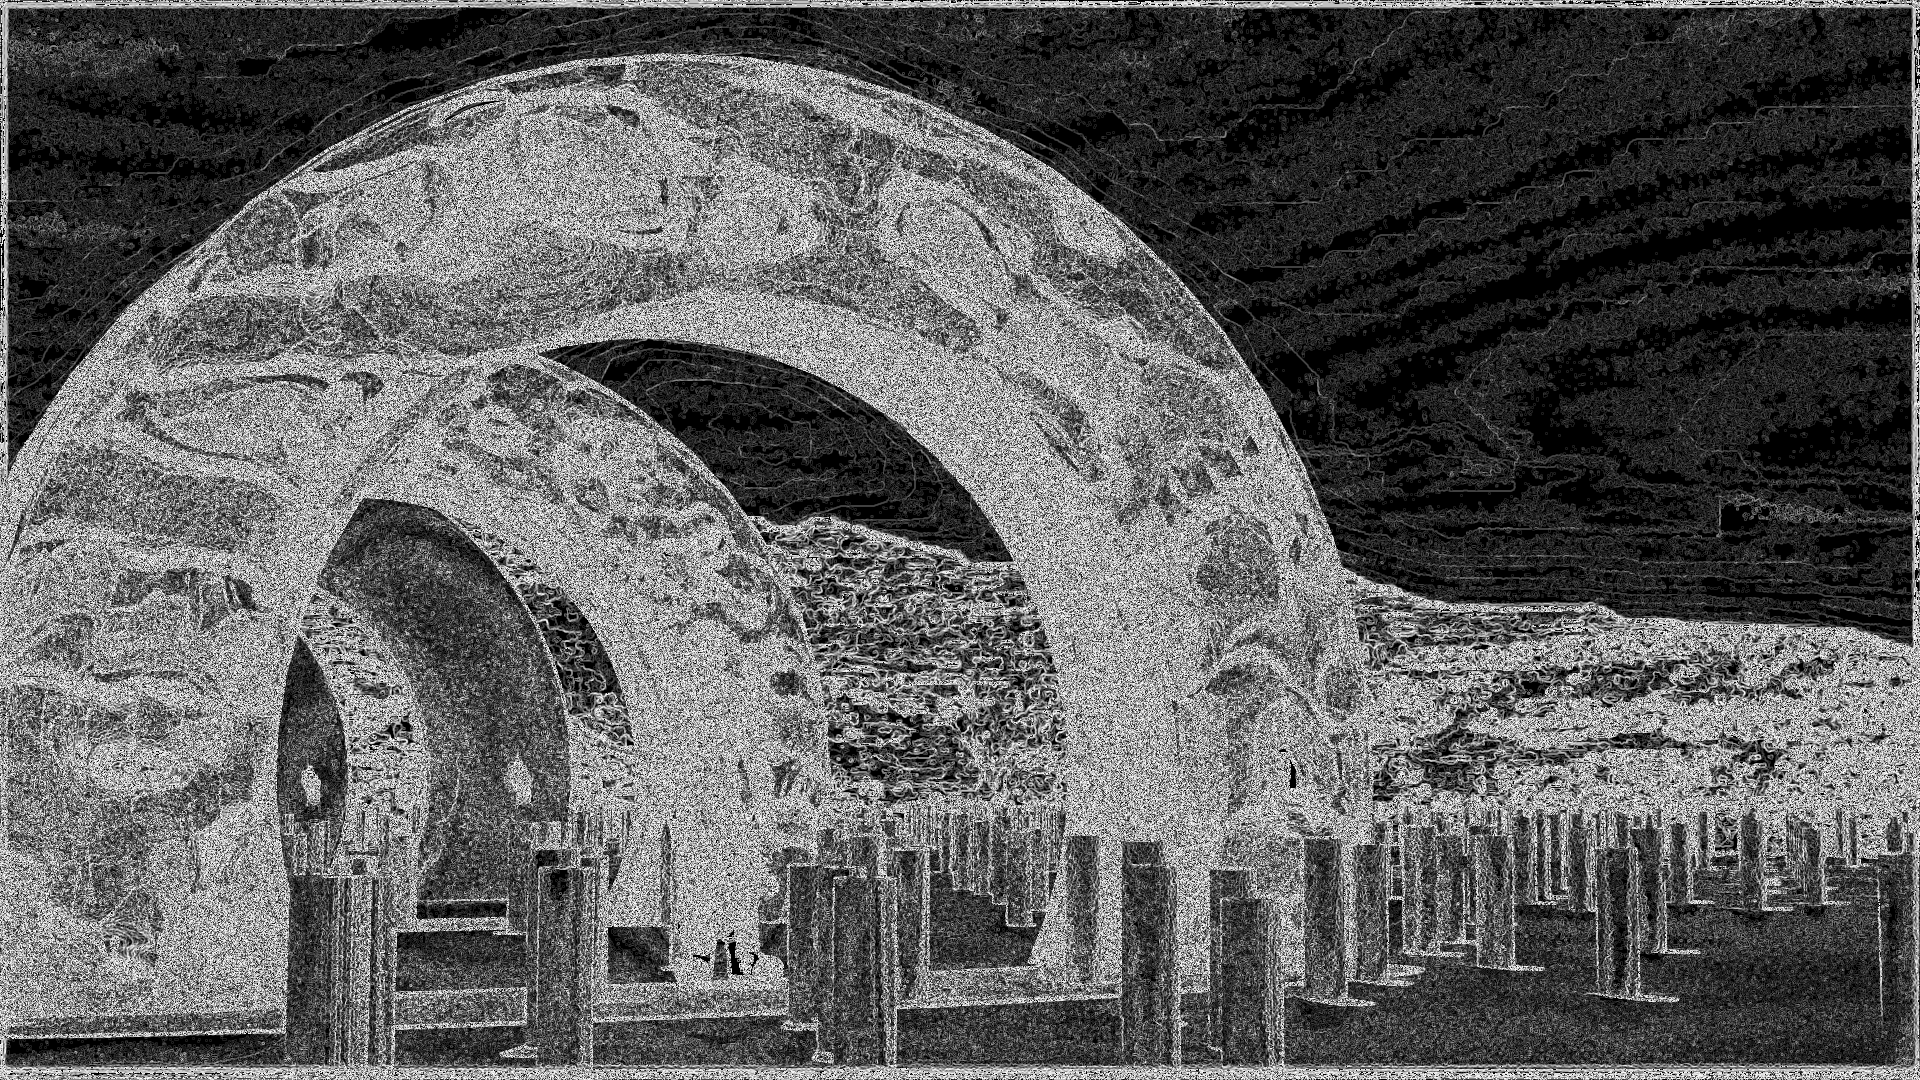

In [45]:
cv2_imshow(sobel_magnitude)

# ***`using sobel filter`**



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def convolve(image,kernel):
  image_height,image_width=image.shape
  kernel_height,kernel_width=kernel.shape
  output=np.zeros_like(image)
  pad_height=kernel_height//2
  pad_width=kernel_width//2
  padded_image=np.pad(image,((pad_height,pad_height),(pad_width,pad_width)),mode="constant")
  for i in range(image_height):
    for j in range(image_width):
      p_image=padded_image[i:i+kernel_height,j:j+kernel_width]
      output[i,j]=np.sum(p_image*kernel)
  return output

In [44]:
sobel_x=convolve(image,x)
sobel_y=convolve(image,y)

sobel_magnitude=np.sqrt(sobel_x**2+sobel_y**2)
sobel_magnitude=(sobel_magnitude/np.max(sobel_magnitude))*255
sobel_magnitude=sobel_magnitude.astype(np.uint8)

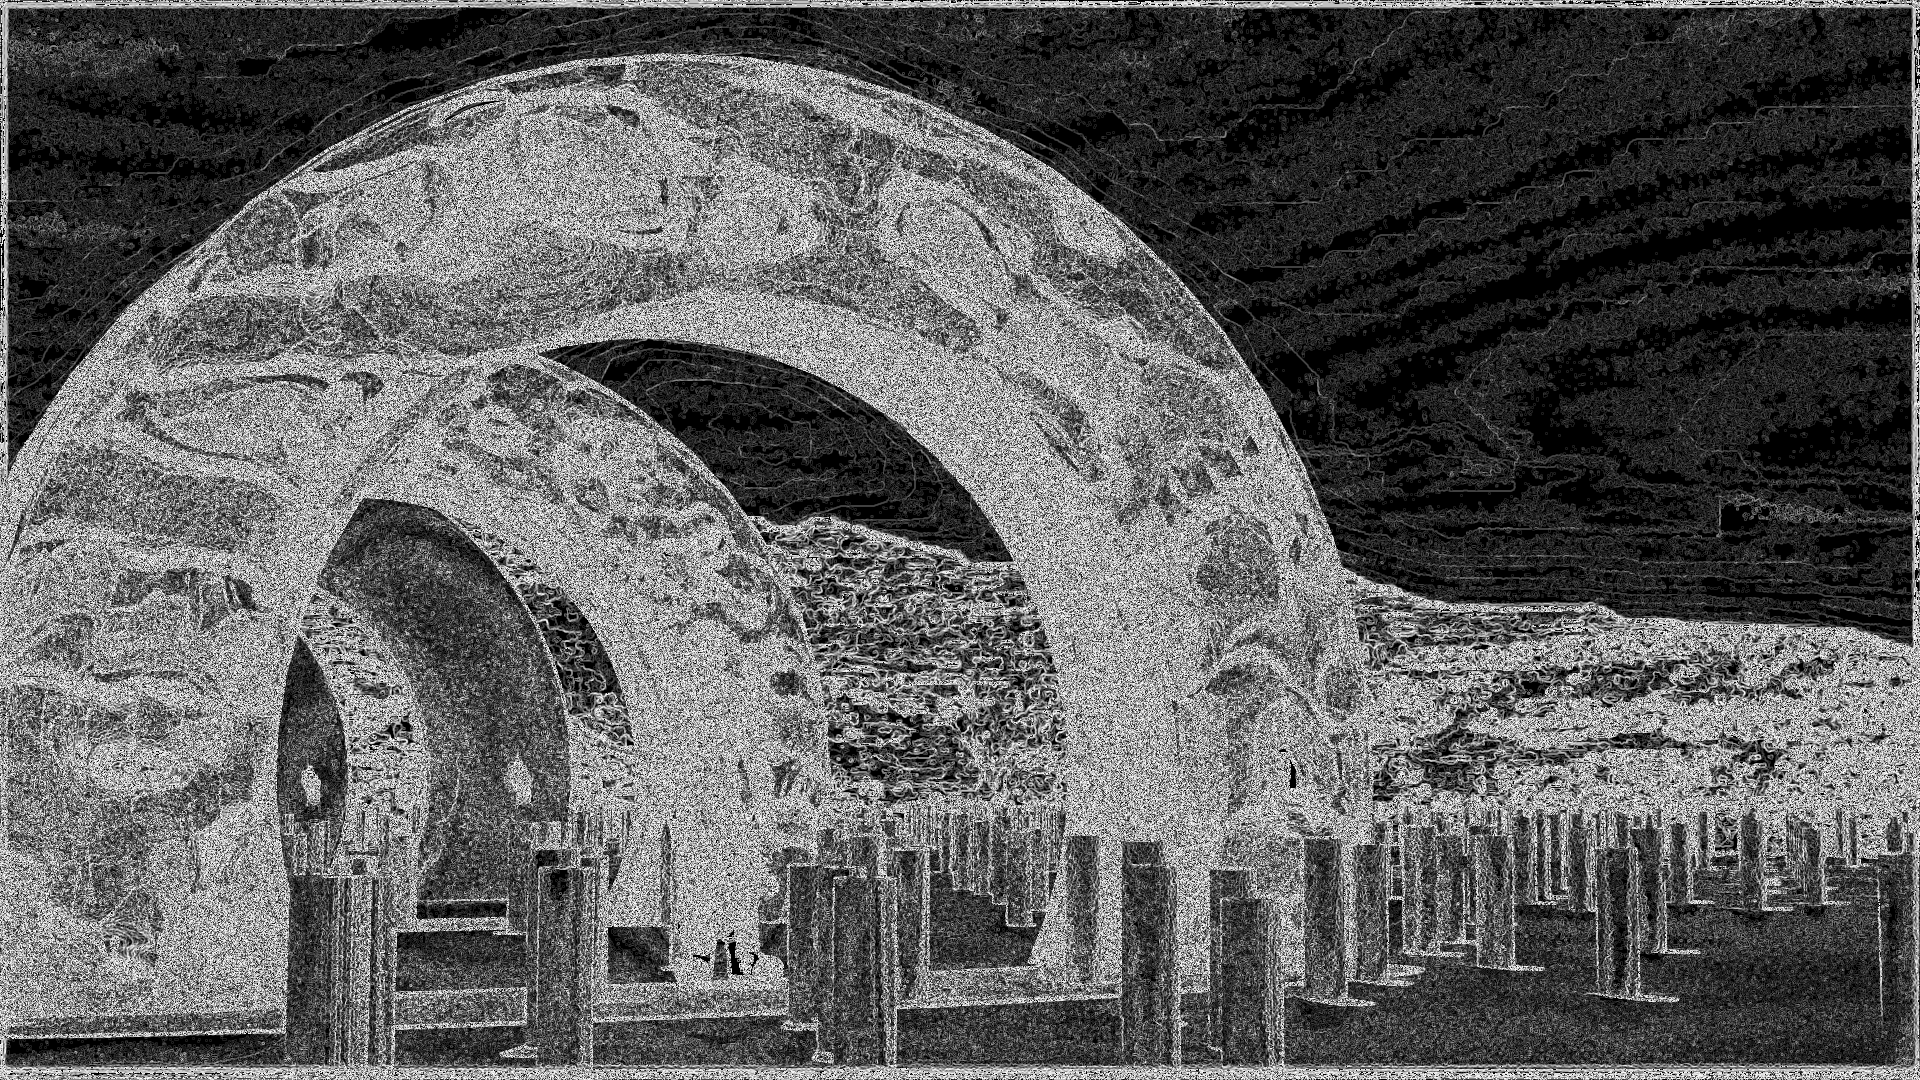

In [82]:

def sobel(image):
  x=np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

  y=np.array([[-1, -2, -1],
              [ 0,  0,  0],
              [ 1,  2,  1]])
  sobel_x=convolve(image,x)
  sobel_y=convolve(image,y)

  sobel_magnitude=np.sqrt(sobel_x**2+sobel_y**2)
  sobel_magnitude=(sobel_magnitude/np.max(sobel_magnitude))*255
  sobel_magnitude=sobel_magnitude.astype(np.uint8)

  return sobel_magnitude


image = cv2.imread('/content/demon.png', cv2.IMREAD_GRAYSCALE)

# Apply the Sobel filter
sobel_image = sobel(image)

# Display the result
cv2_imshow(sobel_image)



In [63]:
low= 50
high = 150
weak_edges = (image >= low) & (image < high)

labels, num_features = cv2.connectedComponents(weak_edges.astype(np.uint8), connectivity=8)


In [66]:
labels,num_features.shape

(1293, (1080, 1920))

# **Hystesis** **Thresholding**

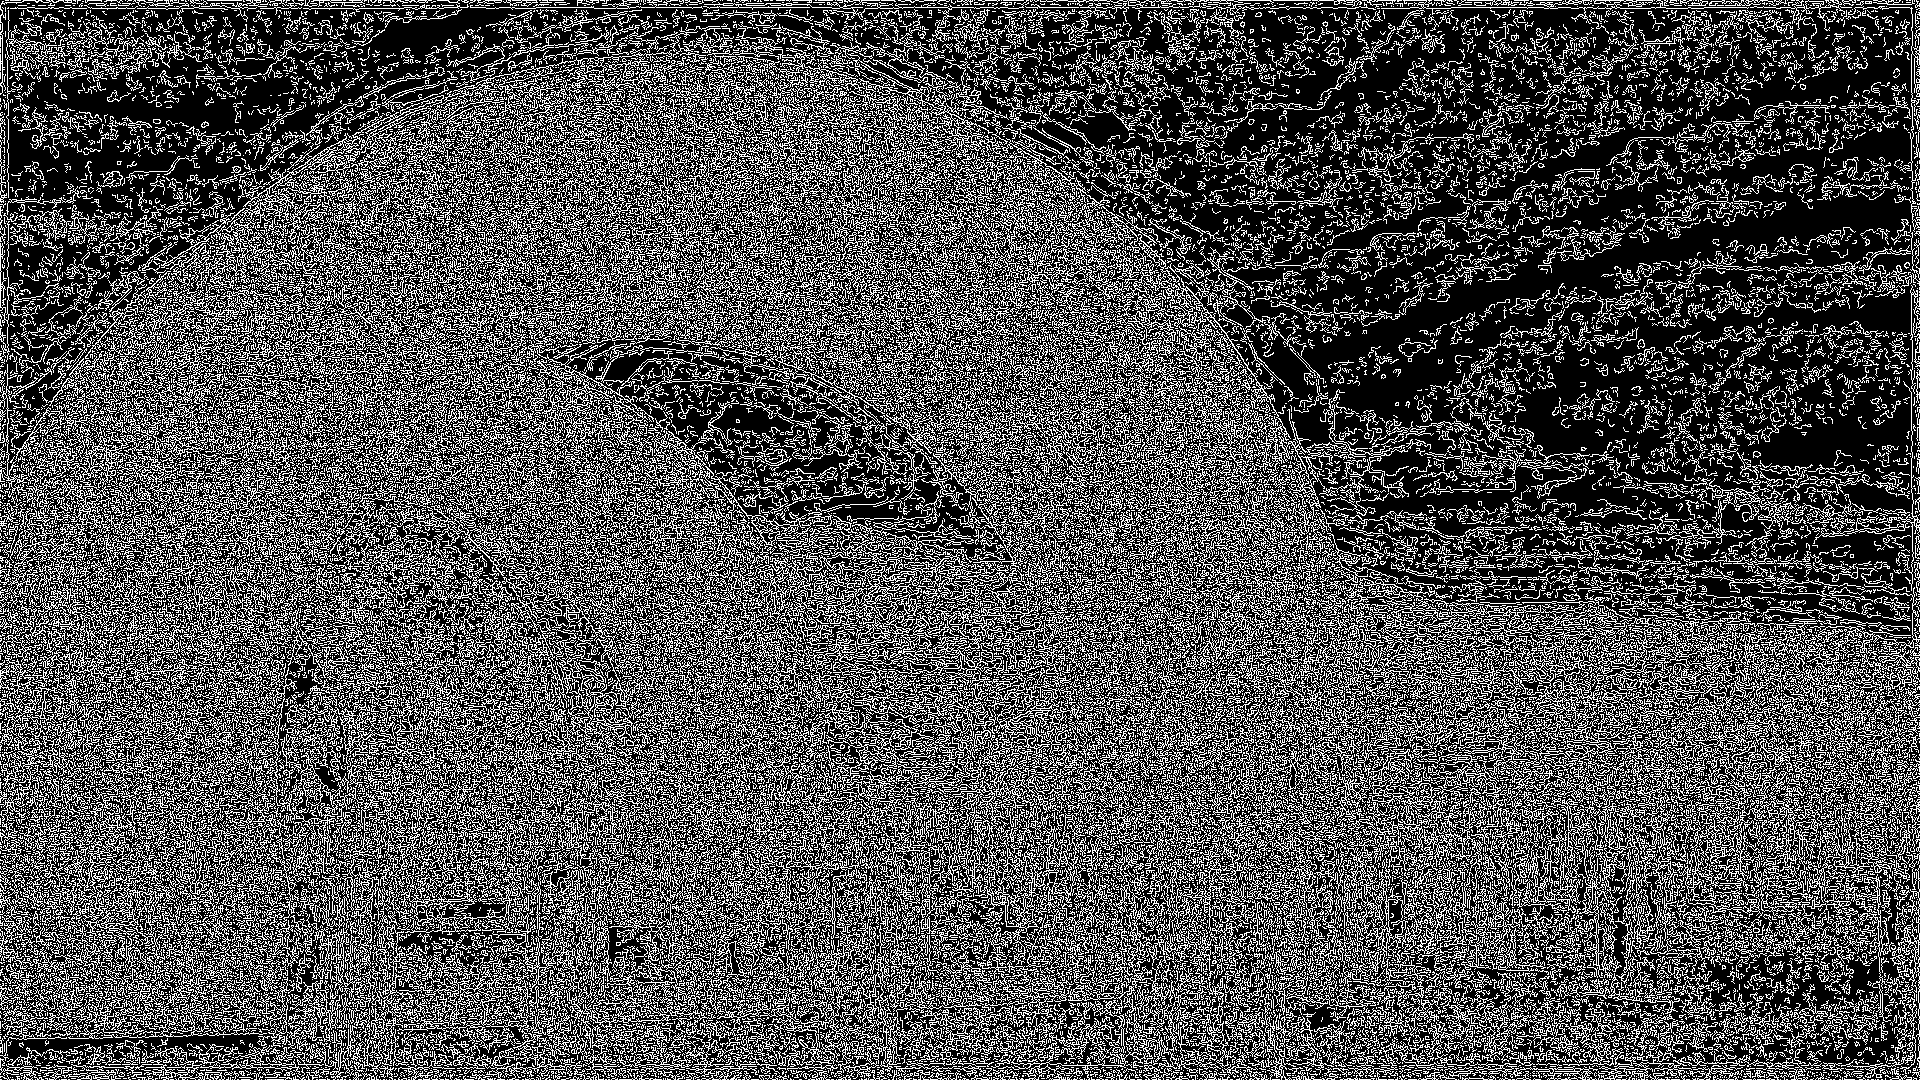

In [81]:
low_threshold = 128
high_threshold = 255
canny_edges = cv2.Canny(sobel_image, low_threshold, high_threshold)
cv2_imshow(canny_edges)

# **USING** **GRADIENT**

In [49]:
import numpy as np

def gradient_x(image):
    return np.gradient(image, axis=1)  # Gradient in x-direction

def gradient_y(image):
    return np.gradient(image, axis=0)  # Gradient in y-direction

# Compute gradients
grad_x = gradient_x(image)
grad_y = gradient_y(image)

# Compute magnitude
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)


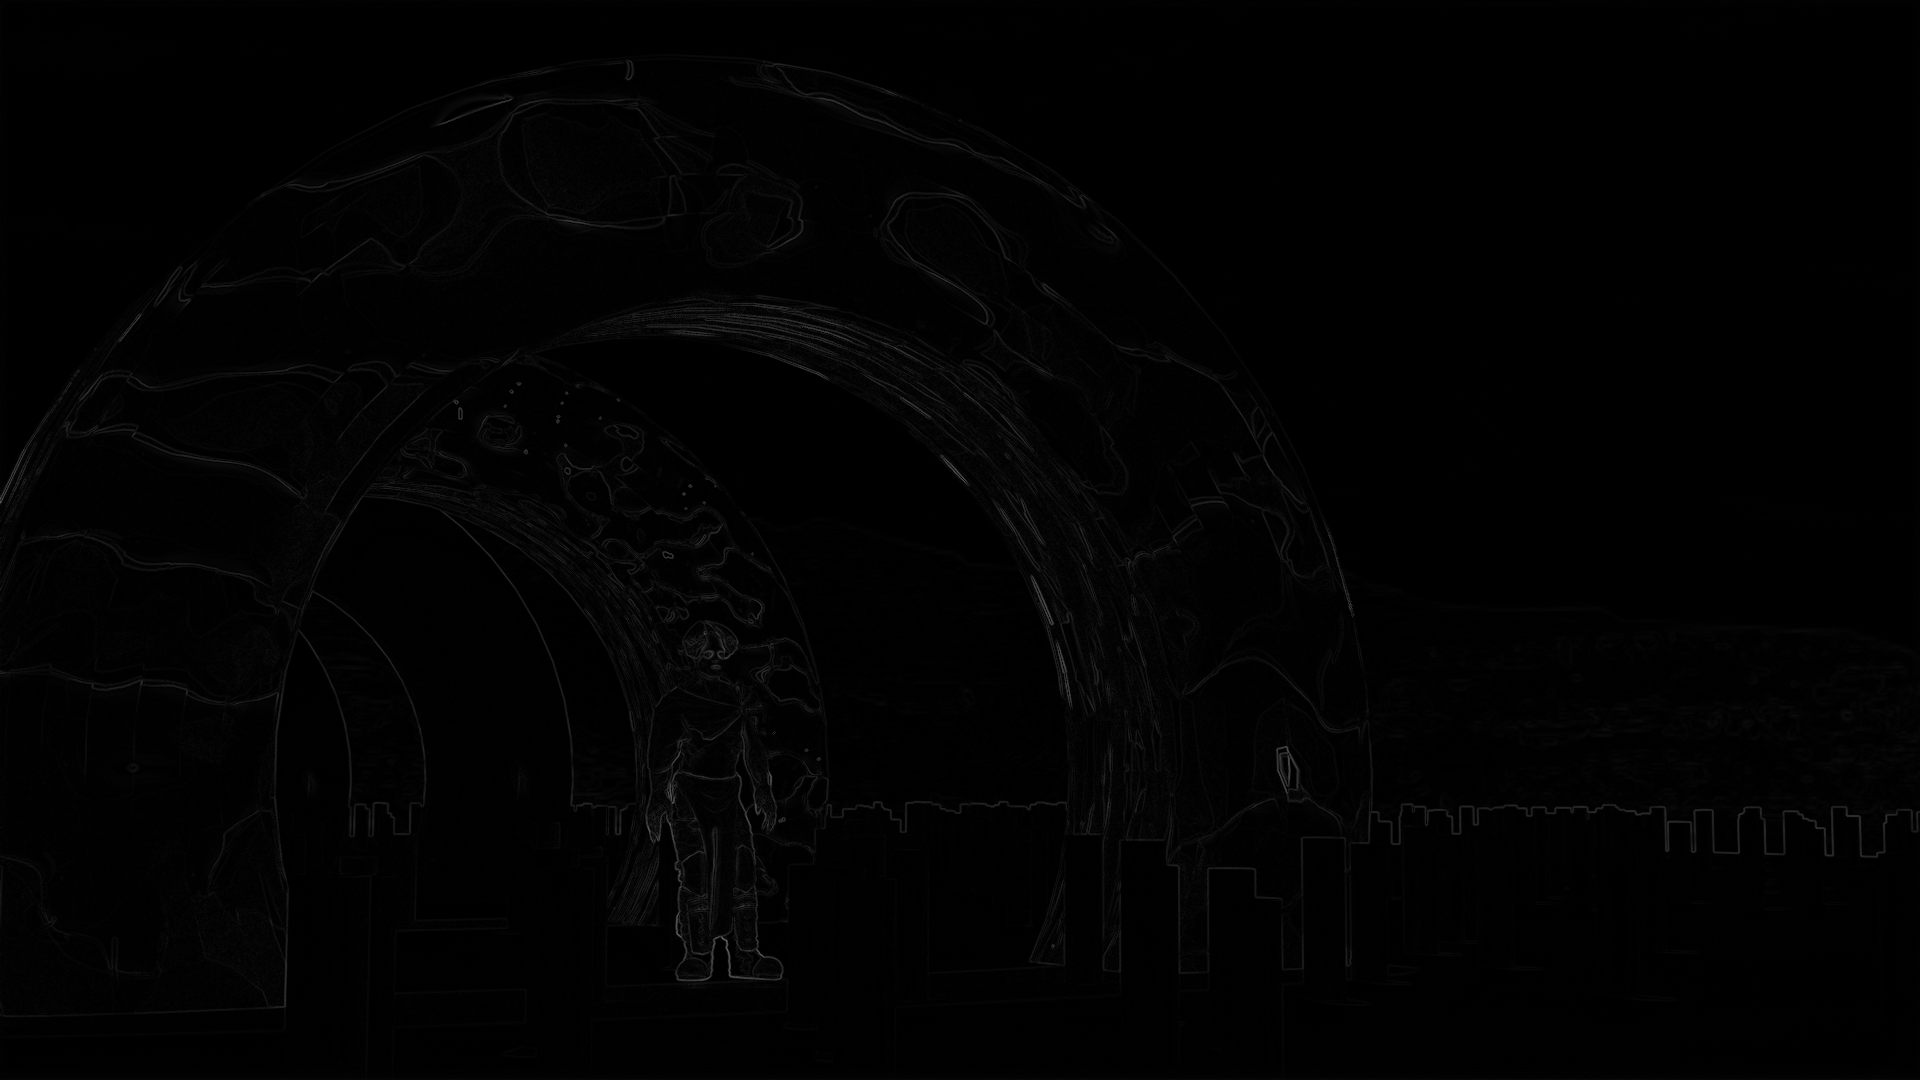

In [50]:
cv2_imshow(grad_magnitude)

# **Gaussian Kernel**

In [86]:
import numpy as np
import cv2

def gaussian_kernel(size, sigma):
  kernel = np.fromfunction(
      lambda x, y: (1 / (2 * np.pi * sigma**2)) *
                    np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
      (size, size)
  )
  return kernel / np.sum(kernel)  # Normalize the kernel

In [95]:
size=10
kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) *
                     np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )

In [96]:
kernel/np.sum(kernel)

array([[0.0070941 , 0.0079278 , 0.00861676, 0.00910901, 0.00936559,
        0.00936559, 0.00910901, 0.00861676, 0.0079278 , 0.0070941 ],
       [0.0079278 , 0.00885946, 0.00962939, 0.01017949, 0.01046622,
        0.01046622, 0.01017949, 0.00962939, 0.00885946, 0.0079278 ],
       [0.00861676, 0.00962939, 0.01046622, 0.01106413, 0.01137578,
        0.01137578, 0.01106413, 0.01046622, 0.00962939, 0.00861676],
       [0.00910901, 0.01017949, 0.01106413, 0.0116962 , 0.01202565,
        0.01202565, 0.0116962 , 0.01106413, 0.01017949, 0.00910901],
       [0.00936559, 0.01046622, 0.01137578, 0.01202565, 0.01236438,
        0.01236438, 0.01202565, 0.01137578, 0.01046622, 0.00936559],
       [0.00936559, 0.01046622, 0.01137578, 0.01202565, 0.01236438,
        0.01236438, 0.01202565, 0.01137578, 0.01046622, 0.00936559],
       [0.00910901, 0.01017949, 0.01106413, 0.0116962 , 0.01202565,
        0.01202565, 0.0116962 , 0.01106413, 0.01017949, 0.00910901],
       [0.00861676, 0.00962939, 0.0104662

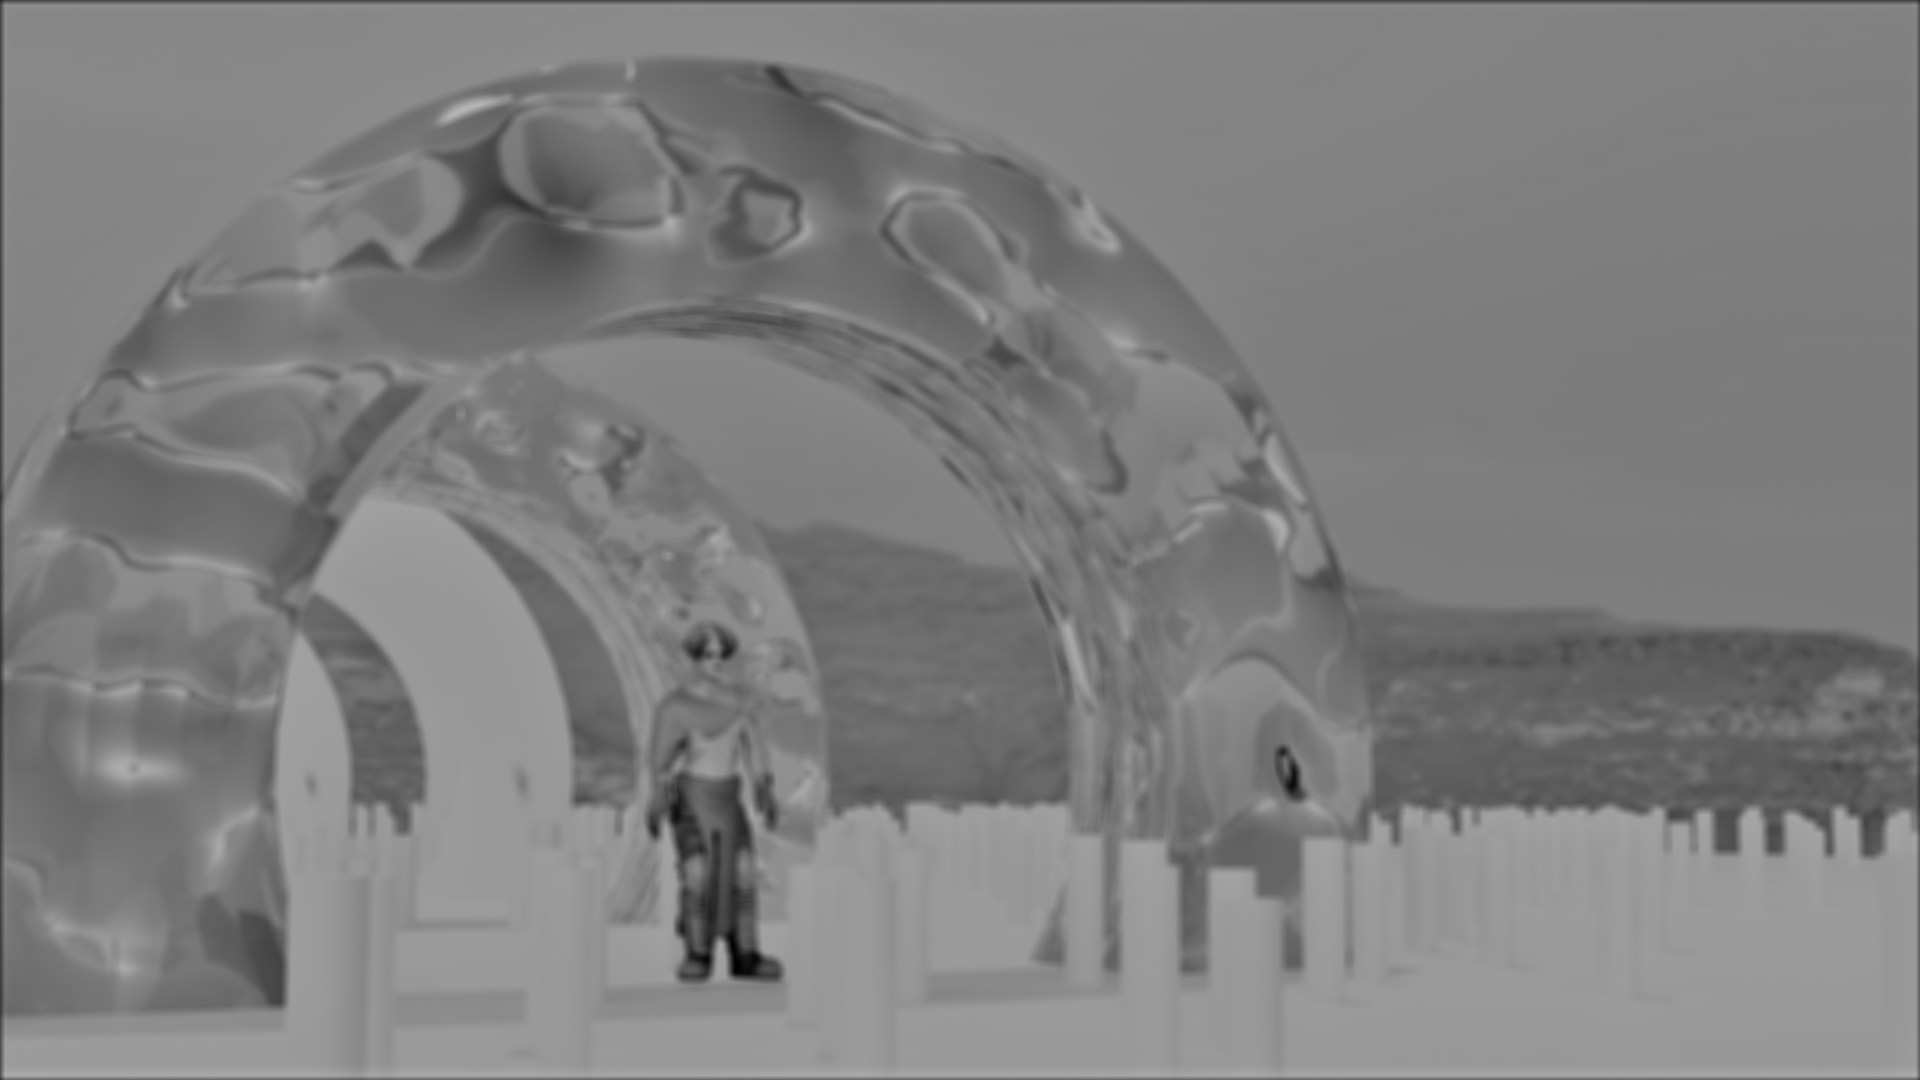

In [94]:
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Compute padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Prepare output image
    output = np.zeros_like(image, dtype=np.float32)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)


image = cv2.imread('/content/demon.png', cv2.IMREAD_GRAYSCALE)

# Define kernel size and sigma
kernel_size = 10
sigma = 6.0

# Generate Gaussian kernel
gaussian_kernel_matrix = gaussian_kernel(kernel_size, sigma)

# Apply Gaussian blur
blurred_image = convolve2d(image, gaussian_kernel_matrix)

cv2_imshow(blurred_image)
